<div class="alert alert-block alert-warning">

# <span style=" color:red"> Stroke Data Project
</span>

Welcome to the data analysis assignment on the Stroke Data Project! In this assignment, we will work with a dataset containing information about various strokes. According to the World Health Organization (WHO), stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get a stroke based on input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relevant information about the patient. Through this analysis, you will gain hands-on experience in essential data analysis steps, including data cleaning, visualization, and exploratory data analysis (EDA).

<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Import Libraries, Loading the Dataset and Initial Exploration
</span>

- Load the dataset, display first few rows, check the structure of the dataset.

- Inspect the data types and missing values using df.info()

- Get basic statistics for numerical columns with df.describe()

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [5]:
# Display the first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# Check the structure and data types
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
# Inspect numerical statistics
print("\nBasic Statistics for Numerical Columns:")
df.describe().T


Basic Statistics for Numerical Columns:


,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [ ]:
# Explanation:
# - The code loads the dataset, inspects its structure using `df.info()`, and displays summary statistics with `df.describe()`.
# Açıklama:
# - Kod, veri setini yüklüyor, `df.info()` ile yapısını inceliyor ve `df.describe()` ile özet istatistiklerini gösteriyor.

<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Data Cleaning: 
</span>

- Handle missing values.

- Check for duplicates and remove them if found.

- Standardize column names (if necessary) for consistent naming conventions.

- Validate data types and convert columns to appropriate types if needed.

In [9]:
# 1. Handle Missing Values
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

# Impute missing BMI values with the median
if "bmi" in df.columns:
    df['bmi'].fillna(df['bmi'].median(), inplace=True)

Missing Values in Each Column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24004\2511765599.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [10]:
# 2. Check for Duplicates
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")


Number of Duplicate Rows: 0


In [11]:
# Remove duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")

In [ ]:
# 3. Standardize Column Names
# Convert column names to lowercase and replace spaces with underscores
# df.columns = df.columns.str.lower().str.replace(' ', '_')

In [12]:
# 4. Validate Data Types and Convert Columns
# Check data types
print("\nColumn Data Types:")
print(df.dtypes)

# Example: Convert 'stroke' to a categorical type if needed
# if df['stroke'].dtype != 'category':
#     df['stroke'] = df['stroke'].astype('category')


Column Data Types:
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [13]:
# Final check after cleaning
print("\nDataset Overview After Cleaning:")
print(df.info())


Dataset Overview After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [ ]:
# Explanation:
# - Missing values in `bmi` are imputed with the median.
# - Duplicate rows are identified and removed.
# - Column names are standardized to lowercase with underscores for consistency.
# - Data types are validated, and adjustments are made for key columns like `stroke`.

# Açıklama:
# - `bmi` sütunundaki eksik değerler medyan ile doldurulur.
# - Çiftlenen satırlar kontrol edilir ve kaldırılır.
# - Sütun isimleri küçük harfe dönüştürülür ve tutarlılık için alt çizgi eklenir.
# - Veri tipleri kontrol edilir ve gerekli sütunlar için ayarlamalar yapılır.

<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Analysis Goal
</span>

<div class="alert alert-block alert-success">

### <span style=" color:red"> How does age influence stroke occurrence?
</span>

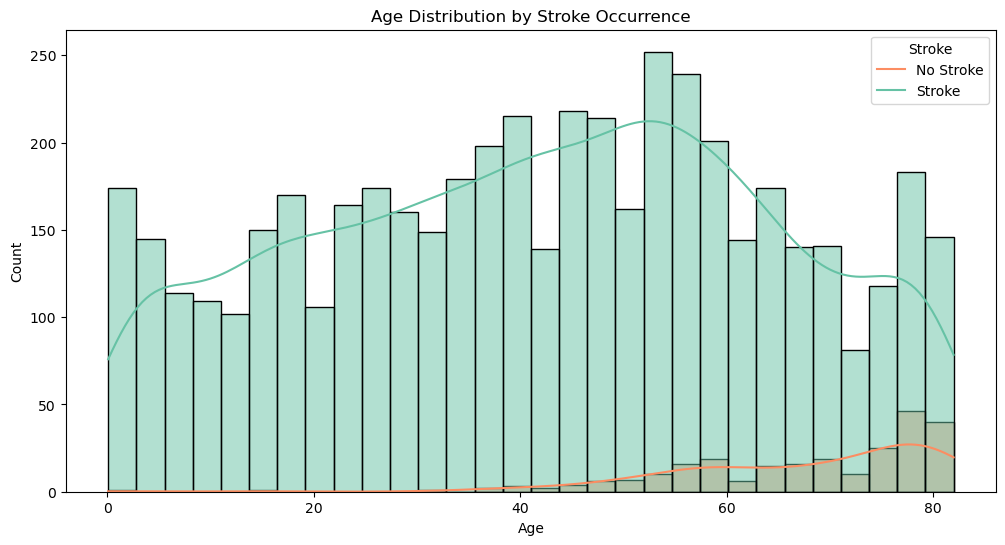

In [14]:
# Analyze the influence of age on stroke occurrence

# 1. Plot Age Distribution for Stroke and Non-Stroke Cases

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="age", hue="stroke", kde=True, palette="Set2", bins=30)
plt.title("Age Distribution by Stroke Occurrence")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Stroke", labels=["No Stroke", "Stroke"])
plt.show()

In [16]:
# 2. Statistical Summary: Compare Median Age for Stroke and Non-Stroke Groups
stroke_stats = df.groupby("stroke")["age"].describe()
print("\nStatistical Summary of Age by Stroke Occurrence:")
stroke_stats


Statistical Summary of Age by Stroke Occurrence:


,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4861.0,41.971545,22.291940,0.08,24.0,43.0,59.0,82.0
1,249.0,67.728193,12.727419,1.32,59.0,71.0,78.0,82.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24004\637346790.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="stroke", y="age", palette="Set3")


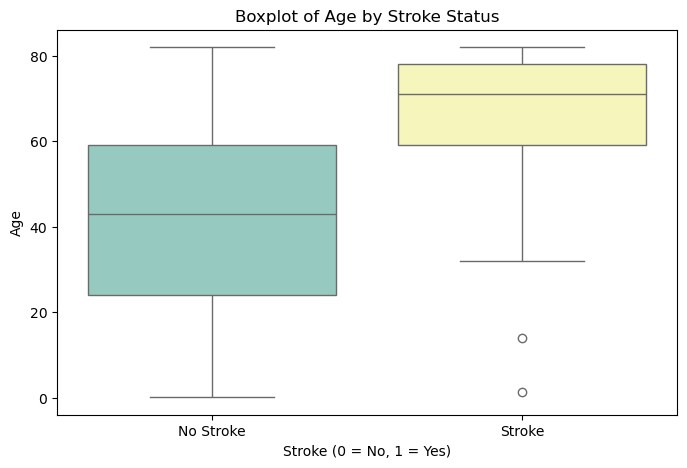

In [17]:
# 3. Boxplot of Age by Stroke Status
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="stroke", y="age", palette="Set3")
plt.title("Boxplot of Age by Stroke Status")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.xticks([0, 1], ["No Stroke", "Stroke"])
plt.show()

In [19]:
# 4. Categorize Age Groups and Calculate Stroke Rates
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 60, 90], labels=["0-30", "31-60", "61+"])
age_group_stroke_rate = df.groupby("age_group")["stroke"].mean()
age_group_stroke_rate

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24004\1248100831.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stroke_rate = df.groupby("age_group")["stroke"].mean()


age_group
0-30     0.001274
31-60    0.031306
61+      0.135736
Name: stroke, dtype: float64

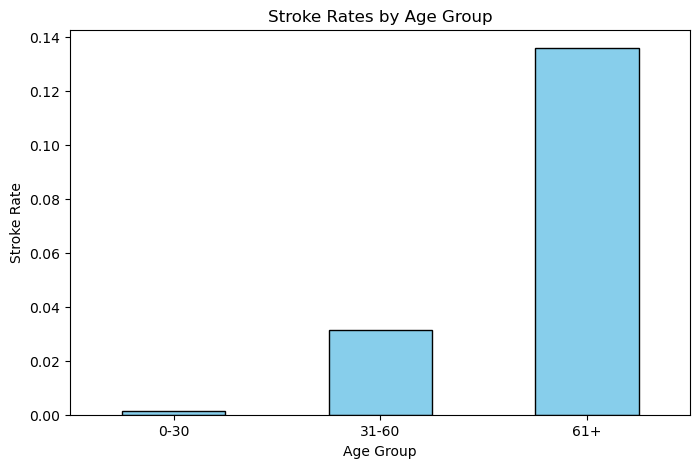

In [20]:
# Bar plot for stroke rates across age groups
plt.figure(figsize=(8, 5))
age_group_stroke_rate.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Stroke Rates by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Stroke Rate")
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Explanation:
# - Histogram shows age distribution for stroke vs. non-stroke cases.
# - Boxplot highlights the median age differences between groups.
# - Stroke rates are analyzed across defined age groups for clarity.

# Açıklama:
# - Histogram, inme ve inme geçirmeyen bireyler için yaş dağılımını gösterir.
# - Boxplot, gruplar arasındaki medyan yaş farklarını vurgular.
# - Belirlenmiş yaş gruplarındaki inme oranları analiz edilmiştir.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Do body mass index (BMI) and glucose levels jointly or independently increase stroke risk?
</span>

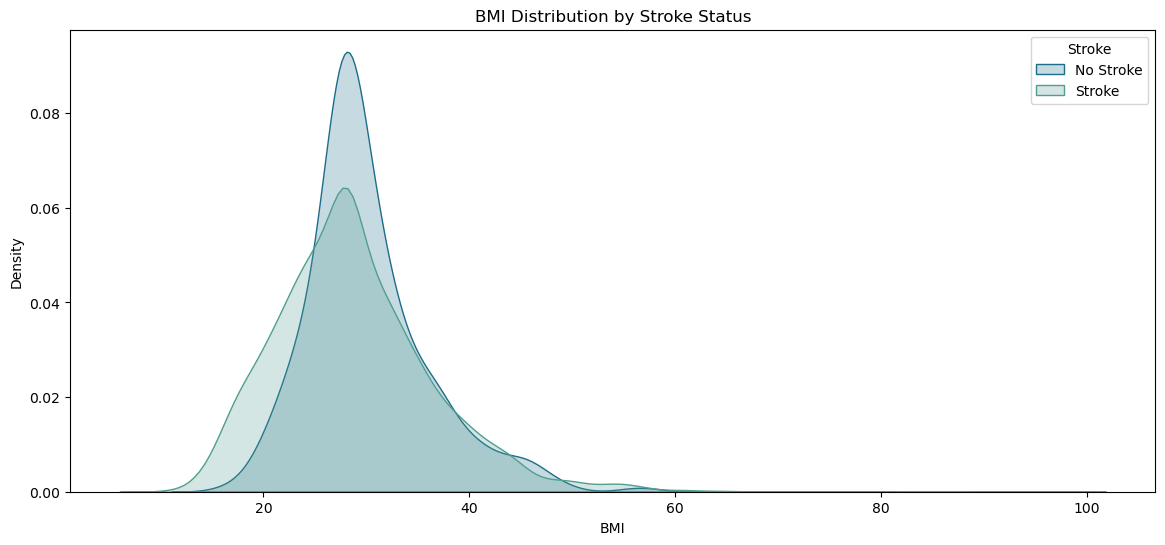

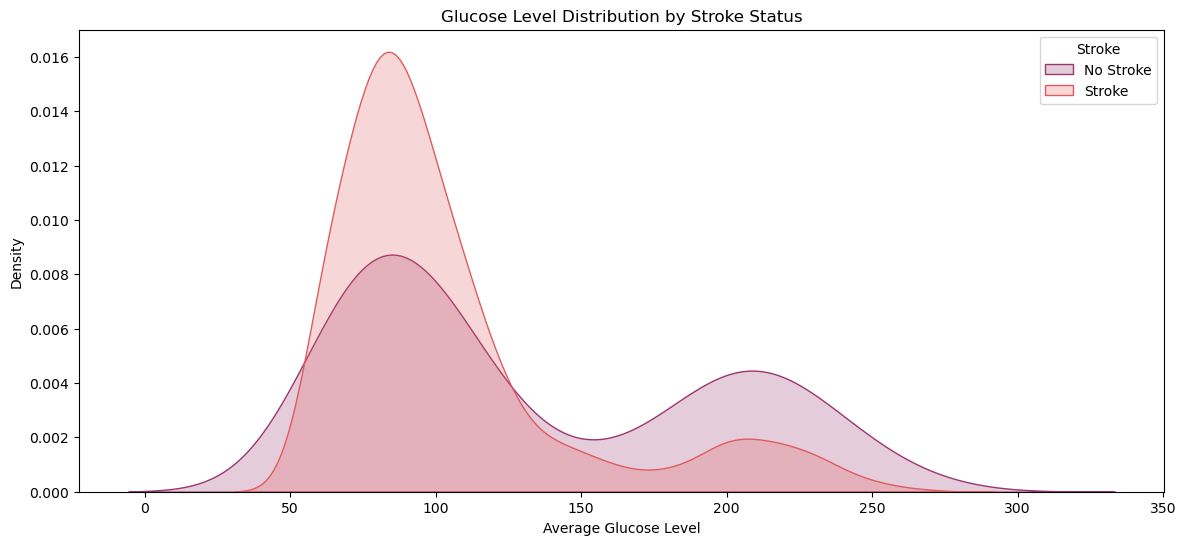

In [21]:
# Analyzing the relationship between BMI, Glucose Levels, and Stroke Risk

# 1. Distribution of BMI and Glucose Levels for Stroke vs Non-Stroke
plt.figure(figsize=(14, 6))
sns.kdeplot(data=df, x="bmi", hue="stroke", fill=True, common_norm=False, palette="crest")
plt.title("BMI Distribution by Stroke Status")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.legend(title="Stroke", labels=["No Stroke", "Stroke"])
plt.show()

plt.figure(figsize=(14, 6))
sns.kdeplot(data=df, x="avg_glucose_level", hue="stroke", fill=True, common_norm=False, palette="flare")
plt.title("Glucose Level Distribution by Stroke Status")
plt.xlabel("Average Glucose Level")
plt.ylabel("Density")
plt.legend(title="Stroke", labels=["No Stroke", "Stroke"])
plt.show()

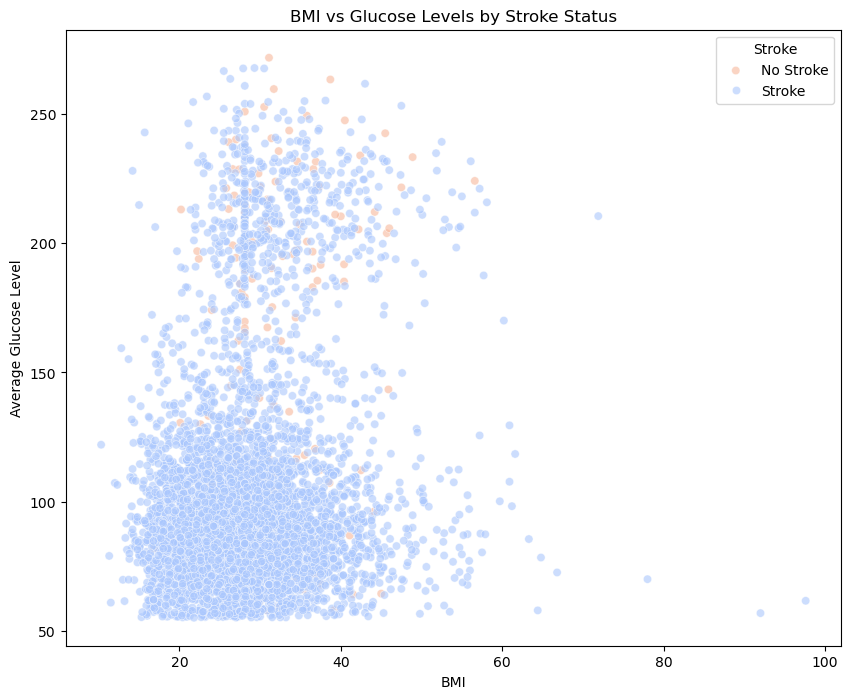

In [22]:
# 2. Scatterplot of BMI vs Glucose Levels, Colored by Stroke Status
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="bmi", y="avg_glucose_level", hue="stroke", palette="coolwarm", alpha=0.6)
plt.title("BMI vs Glucose Levels by Stroke Status")
plt.xlabel("BMI")
plt.ylabel("Average Glucose Level")
plt.legend(title="Stroke", labels=["No Stroke", "Stroke"])
plt.show()

In [24]:
# 3. Statistical Summary of BMI and Glucose Levels for Stroke and Non-Stroke Groups
stroke_stats = df.groupby("stroke")[["bmi", "avg_glucose_level"]].describe()
print("\nStatistical Summary of BMI and Glucose Levels by Stroke Status:")
stroke_stats


Statistical Summary of BMI and Glucose Levels by Stroke Status:


bmi                                                     \
         count       mean       std   min   25%   50%   75%   max   
stroke                                                              
0       4861.0  28.799115  7.777269  10.3  23.6  28.1  32.8  97.6   
1        249.0  30.090361  5.861877  16.9  27.0  28.1  32.5  56.6   

       avg_glucose_level                                                       \
                   count        mean        std    min    25%     50%     75%   
stroke                                                                          
0                 4861.0  104.795513  43.846069  55.12  77.12   91.47  112.83   
1                  249.0  132.544739  61.921056  56.11  79.79  105.22  196.71   

                
           max  
stroke          
0       267.76  
1       271.74

In [25]:
# 4. Binning BMI and Glucose Levels for Joint Analysis
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 40, 100], 
                            labels=["Underweight", "Normal", "Overweight", "Obese", "Severely Obese"])

df['glucose_category'] = pd.cut(df['avg_glucose_level'], bins=[0, 90, 125, 200, 300], 
                                labels=["Normal", "Pre-Diabetic", "Diabetic", "Severe Diabetic"])

In [27]:
# Crosstab of Stroke Rates by BMI and Glucose Categories
crosstab = pd.crosstab(df['bmi_category'], df['glucose_category'], 
                       values=df['stroke'], aggfunc='mean')
print("\nCrosstab of Stroke Rates by BMI and Glucose Categories:")
crosstab


Crosstab of Stroke Rates by BMI and Glucose Categories:


glucose_category,Normal,Pre-Diabetic,Diabetic,Severe Diabetic
bmi_category,,,,
Underweight,0.005348,0.000000,0.000000,0.000000
Normal,0.028391,0.025586,0.048387,0.032258
Overweight,0.062169,0.049057,0.109290,0.156028
Obese,0.030349,0.042373,0.084746,0.129944
Severely Obese,0.017751,0.018692,0.058824,0.123457


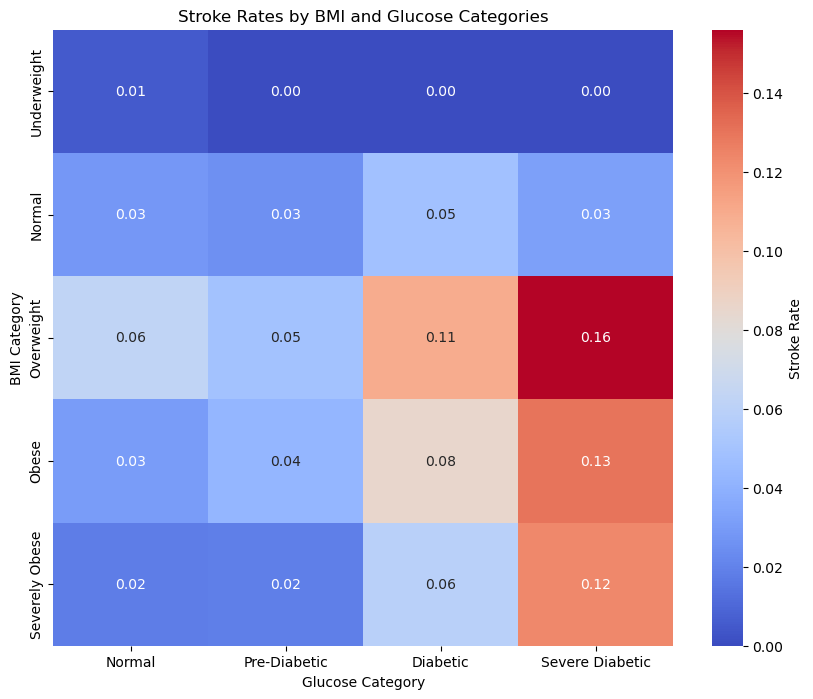

In [28]:
# Heatmap of Stroke Risk by BMI and Glucose Categories
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Stroke Rate'})
plt.title("Stroke Rates by BMI and Glucose Categories")
plt.xlabel("Glucose Category")
plt.ylabel("BMI Category")
plt.show()

In [ ]:
# Explanation:
# - KDE plots compare BMI and glucose level distributions for stroke vs non-stroke cases.
# - Scatterplot shows the joint distribution of BMI and glucose levels.
# - Binning BMI and glucose levels reveals stroke rates across risk groups via a heatmap.

# Açıklama:
# - KDE grafikleri, inme ve inmeyen bireyler için BMI ve glikoz seviyelerinin dağılımını karşılaştırır.
# - Scatterplot, BMI ve glikoz seviyelerinin ortak dağılımını gösterir.
# - BMI ve glikoz seviyeleri kategorilere ayrılarak inme oranları heatmap ile gösterilmiştir.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Can smoking increase the likelihood of stroke?
</span>

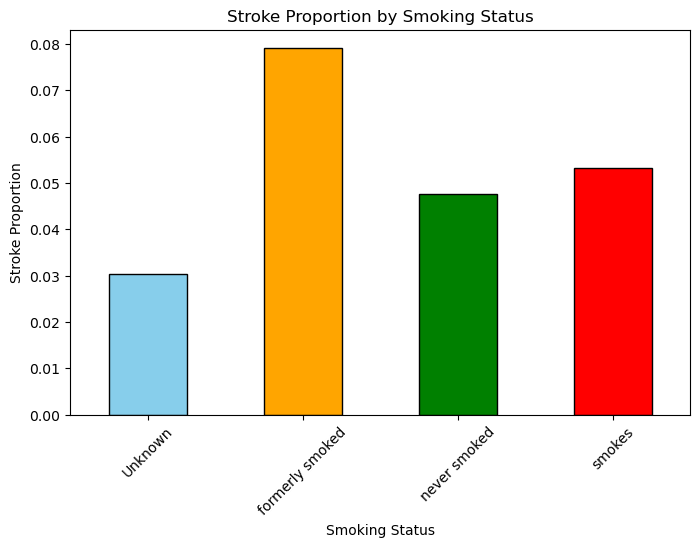

In [29]:
# Analyzing the Impact of Smoking on Stroke Likelihood

# 1. Bar Plot: Stroke Proportions by Smoking Status
smoking_stroke_rate = df.groupby("smoking_status")["stroke"].mean()

plt.figure(figsize=(8, 5))
smoking_stroke_rate.plot(kind="bar", color=["skyblue", "orange", "green", "red"], edgecolor="black")
plt.title("Stroke Proportion by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Stroke Proportion")
plt.xticks(rotation=45)
plt.show()

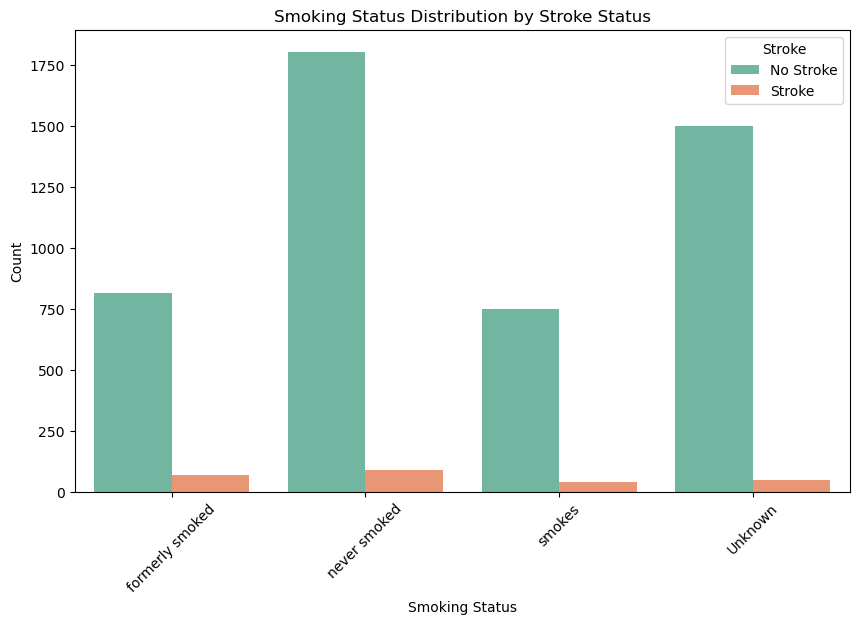

In [30]:
# 2. Distribution of Smoking Status Across Stroke and Non-Stroke Cases
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="smoking_status", hue="stroke", palette="Set2")
plt.title("Smoking Status Distribution by Stroke Status")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.legend(title="Stroke", labels=["No Stroke", "Stroke"])
plt.xticks(rotation=45)
plt.show()

In [32]:
# 3. Statistical Summary of Smoking and Stroke
smoking_summary = df.groupby("smoking_status")["stroke"].agg(['mean', 'count'])
print("\nStatistical Summary of Stroke by Smoking Status:")
smoking_summary


Statistical Summary of Stroke by Smoking Status:


,mean,count
smoking_status,,
Unknown,0.030440,1544
formerly smoked,0.079096,885
never smoked,0.047569,1892
smokes,0.053232,789


In [33]:
# 4. Combined Analysis: Smoking, Hypertension, and Stroke
combined_stroke_rate = df.groupby(["smoking_status", "hypertension"])["stroke"].mean().reset_index()

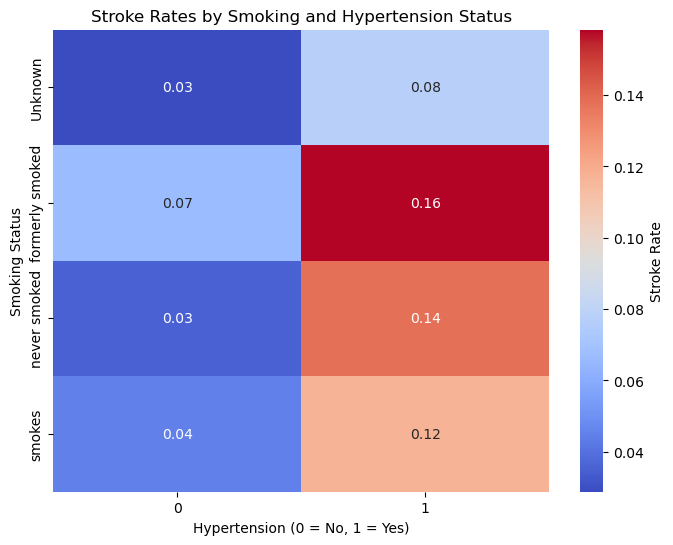

In [35]:
# Heatmap of Combined Effect of Smoking and Hypertension on Stroke

combined_pivot = combined_stroke_rate.pivot(index="smoking_status", columns="hypertension", values="stroke")

plt.figure(figsize=(8, 6))
sns.heatmap(combined_pivot, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Stroke Rate'})
plt.title("Stroke Rates by Smoking and Hypertension Status")
plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel("Smoking Status")
plt.show()

In [ ]:
# Explanation:
# - Bar plot shows stroke proportions for each smoking category.
# - Countplot visualizes the distribution of stroke and non-stroke cases by smoking status.
# - Combined analysis investigates the joint effect of smoking and hypertension on stroke.

# Açıklama:
# - Bar grafiği, her sigara içme durumu için inme oranlarını gösterir.
# - Countplot, inme geçiren ve geçirmeyen bireylerin sigara içme durumlarına göre dağılımını görselleştirir.
# - Kombine analiz, sigara içme durumu ve hipertansiyonun inme üzerindeki ortak etkisini inceler.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Do individuals with heart disease face a higher stroke risk?
</span>

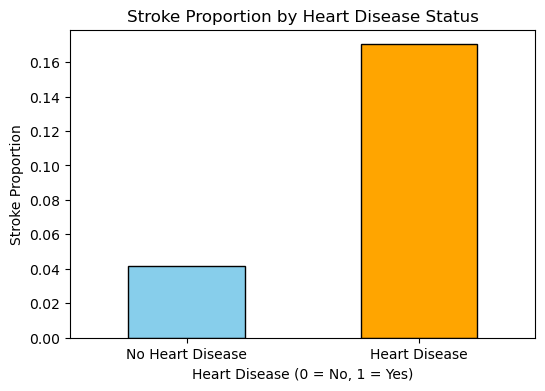

In [36]:
# Analyzing the Impact of Heart Disease on Stroke Risk

# 1. Proportion of Stroke Cases by Heart Disease Status
heart_disease_stroke_rate = df.groupby("heart_disease")["stroke"].mean()

plt.figure(figsize=(6, 4))
heart_disease_stroke_rate.plot(kind="bar", color=["skyblue", "orange"], edgecolor="black")
plt.title("Stroke Proportion by Heart Disease Status")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Stroke Proportion")
plt.xticks([0, 1], ["No Heart Disease", "Heart Disease"], rotation=0)
plt.show()

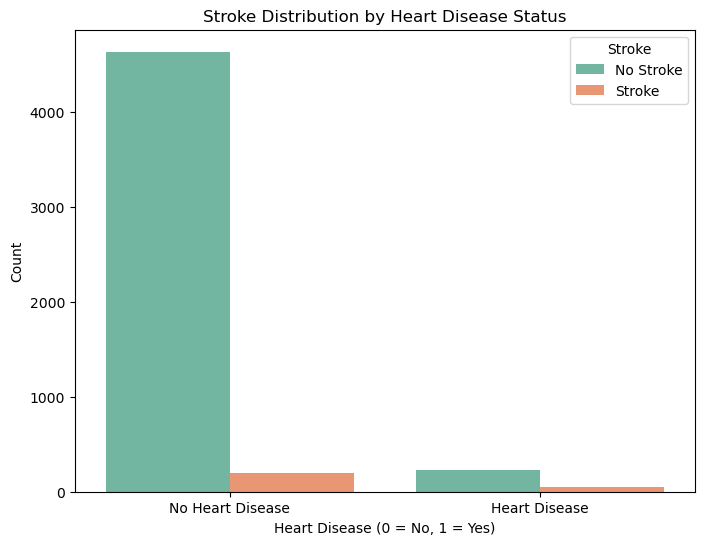

In [37]:
# 2. Count Plot: Stroke Distribution by Heart Disease
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="heart_disease", hue="stroke", palette="Set2")
plt.title("Stroke Distribution by Heart Disease Status")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Stroke", labels=["No Stroke", "Stroke"])
plt.xticks([0, 1], ["No Heart Disease", "Heart Disease"], rotation=0)
plt.show()

In [39]:
# 3. Statistical Summary of Stroke by Heart Disease Status
heart_disease_summary = df.groupby("heart_disease")["stroke"].agg(['mean', 'count'])
print("\nStatistical Summary of Stroke by Heart Disease Status:")
heart_disease_summary


Statistical Summary of Stroke by Heart Disease Status:


,mean,count
heart_disease,,
0,0.041787,4834
1,0.170290,276


In [40]:
# 4. Combined Analysis: Heart Disease, Hypertension, and Stroke
combined_heart_hypertension = df.groupby(["heart_disease", "hypertension"])["stroke"].mean().reset_index()

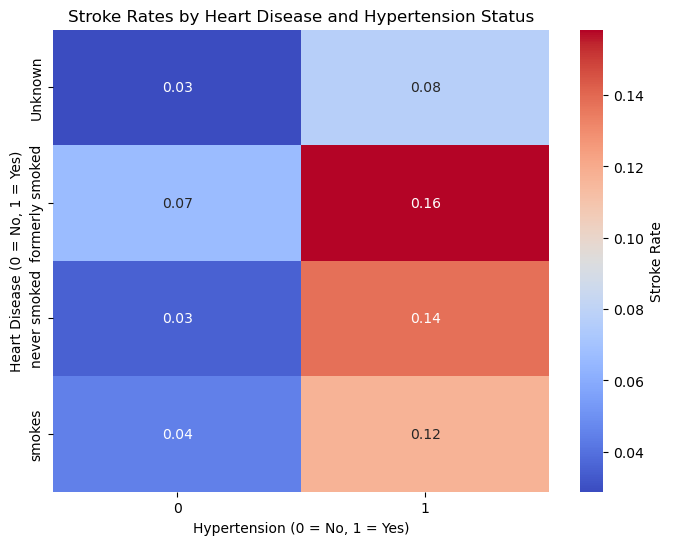

In [42]:
# Heatmap of Combined Effect of Heart Disease and Hypertension on Stroke
combined_pivot = combined_stroke_rate.pivot(index="smoking_status", columns="hypertension", values="stroke")

plt.figure(figsize=(8, 6))
sns.heatmap(combined_pivot, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Stroke Rate'})
plt.title("Stroke Rates by Heart Disease and Hypertension Status")
plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel("Heart Disease (0 = No, 1 = Yes)")
plt.show()

In [ ]:
# Explanation:
# - Bar plot shows stroke proportions for individuals with and without heart disease.
# - Count plot highlights the distribution of stroke cases by heart disease status.
# - Combined analysis examines how heart disease and hypertension interact to affect stroke risk.

# Açıklama:
# - Bar grafiği, kalp hastalığı olan ve olmayan bireyler için inme oranlarını gösterir.
# - Countplot, inme geçiren bireylerin kalp hastalığı durumuna göre dağılımını vurgular.
# - Kombine analiz, kalp hastalığı ve hipertansiyonun inme üzerindeki ortak etkisini inceler.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Does work-related stress contribute to hypertension and subsequently to strokes?
</span>

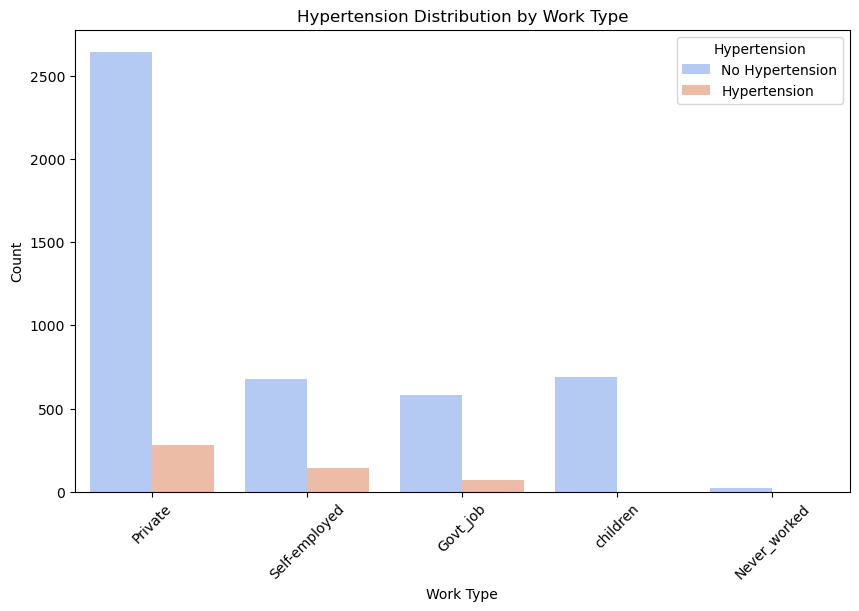

In [43]:
# Analyzing the Impact of Work-Related Stress on Hypertension and Stroke

# 1. Distribution of Hypertension Across Work Types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="work_type", hue="hypertension", palette="coolwarm")
plt.title("Hypertension Distribution by Work Type")
plt.xlabel("Work Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Hypertension", labels=["No Hypertension", "Hypertension"])
plt.show()

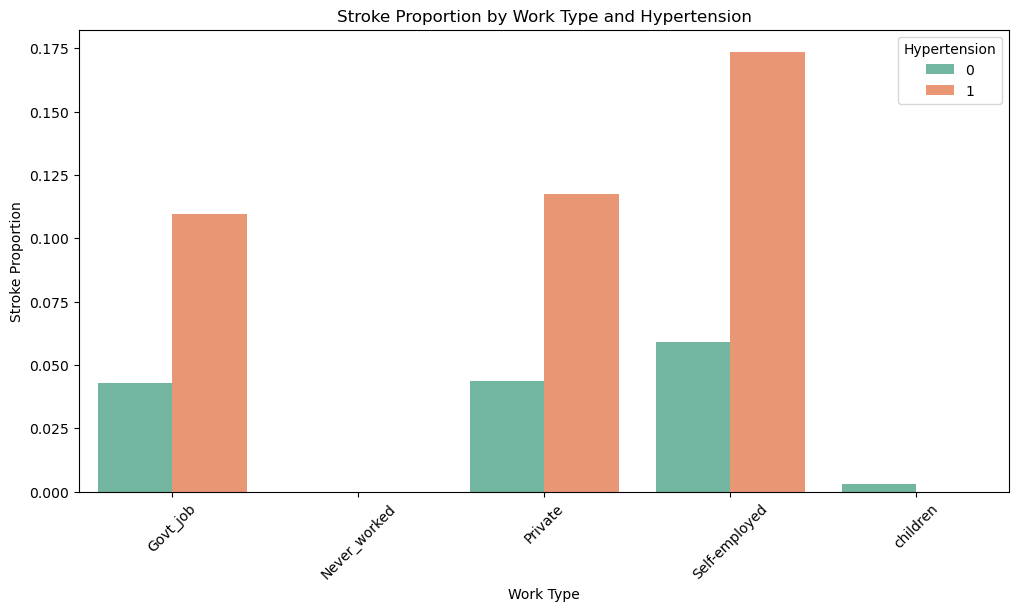

In [44]:
# 2. Stroke Proportion by Work Type and Hypertension
work_hypertension_stroke = df.groupby(["work_type", "hypertension"])["stroke"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=work_hypertension_stroke, x="work_type", y="stroke", hue="hypertension", palette="Set2")
plt.title("Stroke Proportion by Work Type and Hypertension")
plt.xlabel("Work Type")
plt.ylabel("Stroke Proportion")
plt.xticks(rotation=45)
plt.legend(title="Hypertension")
plt.show()

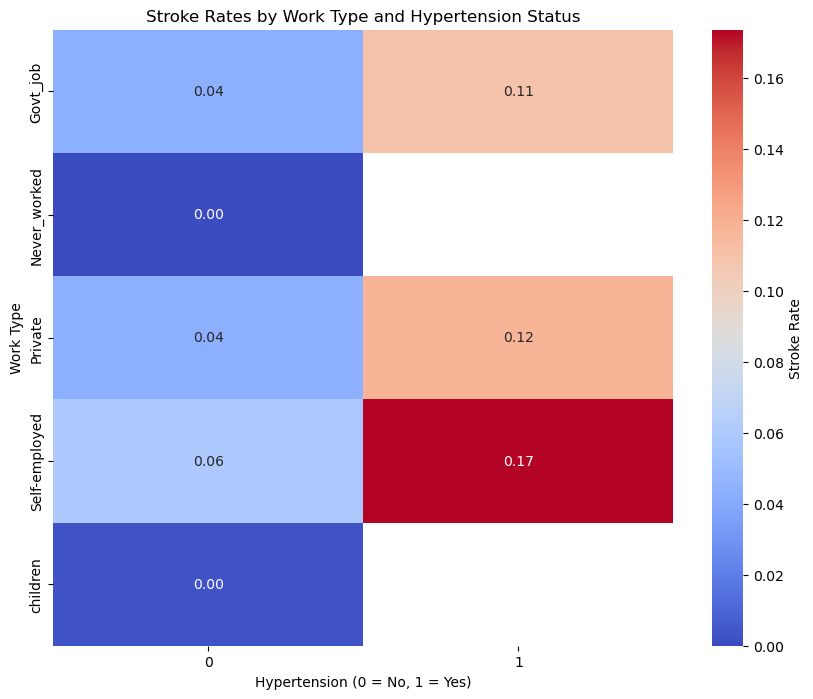

In [45]:
# 3. Combined Effect of Work Type and Hypertension on Stroke
combined_effect = pd.crosstab(df['work_type'], df['hypertension'], values=df['stroke'], aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(combined_effect, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Stroke Rate'})
plt.title("Stroke Rates by Work Type and Hypertension Status")
plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel("Work Type")
plt.show()

In [47]:
# 4. Statistical Summary
work_hypertension_summary = df.groupby(["work_type", "hypertension"])["stroke"].agg(['mean', 'count'])
print("\nStatistical Summary of Stroke by Work Type and Hypertension:")
work_hypertension_summary


Statistical Summary of Stroke by Work Type and Hypertension:


mean  count
work_type     hypertension                 
Govt_job      0             0.042808    584
              1             0.109589     73
Never_worked  0             0.000000     22
Private       0             0.043873   2644
              1             0.117438    281
Self-employed 0             0.059259    675
              1             0.173611    144
children      0             0.002911    687

In [ ]:
# Explanation:
# - The count plot visualizes the distribution of hypertension across different work types.
# - The bar plot shows how stroke proportions vary by work type and hypertension status.
# - The heatmap highlights the combined impact of work type and hypertension on stroke rates.

# Açıklama:
# - Countplot, farklı iş türlerinde hipertansiyon dağılımını görselleştirir.
# - Bar grafiği, iş türüne ve hipertansiyon durumuna göre inme oranlarının nasıl değiştiğini gösterir.
# - Heatmap, iş türü ve hipertansiyonun inme oranları üzerindeki ortak etkisini vurgular.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Are males at higher risk of strokes due to work-related or lifestyle stress?
</span>

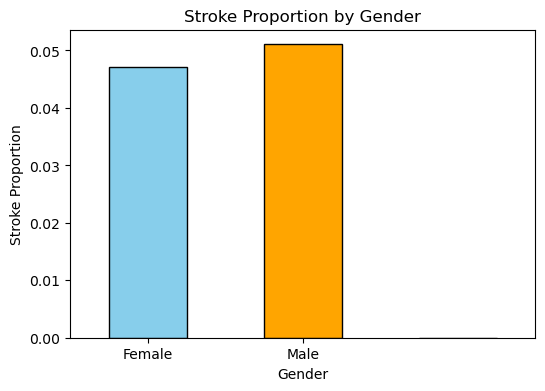

In [48]:
# Analyzing Stroke Risk in Males Due to Work-Related or Lifestyle Stress

# 1. Stroke Proportion by Gender
gender_stroke_rate = df.groupby("gender")["stroke"].mean()

plt.figure(figsize=(6, 4))
gender_stroke_rate.plot(kind="bar", color=["skyblue", "orange"], edgecolor="black")
plt.title("Stroke Proportion by Gender")
plt.xlabel("Gender")
plt.ylabel("Stroke Proportion")
plt.xticks([0, 1], ["Female", "Male"], rotation=0)
plt.show()

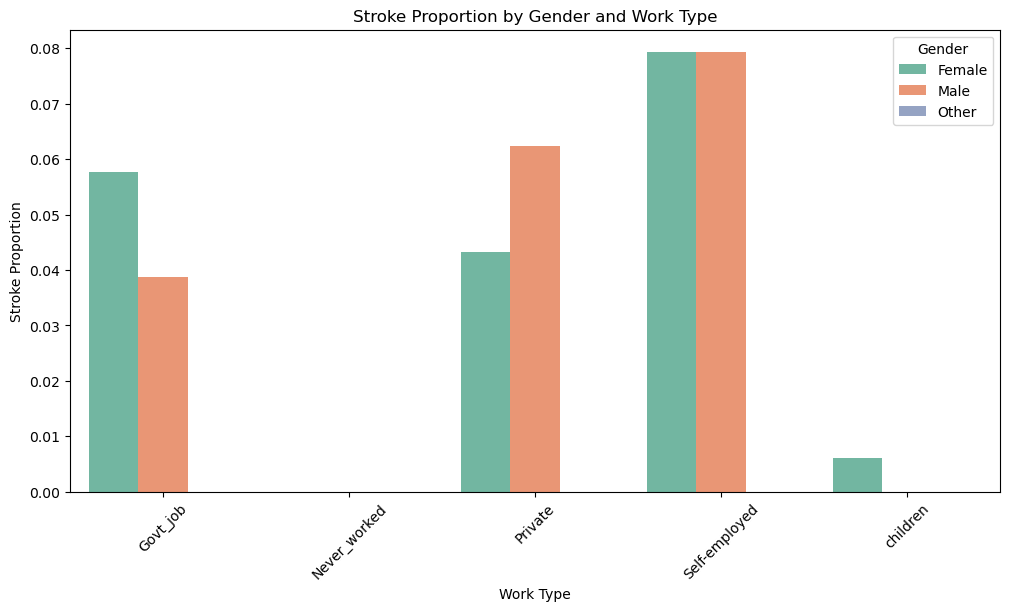

In [49]:
# 2. Stroke Proportion by Gender and Work Type
gender_work_stroke = df.groupby(["gender", "work_type"])["stroke"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=gender_work_stroke, x="work_type", y="stroke", hue="gender", palette="Set2")
plt.title("Stroke Proportion by Gender and Work Type")
plt.xlabel("Work Type")
plt.ylabel("Stroke Proportion")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.show()

In [50]:
# 3. Combined Analysis: Gender, Hypertension, and Stroke
gender_hypertension_stroke = df.groupby(["gender", "hypertension"])["stroke"].mean().reset_index()

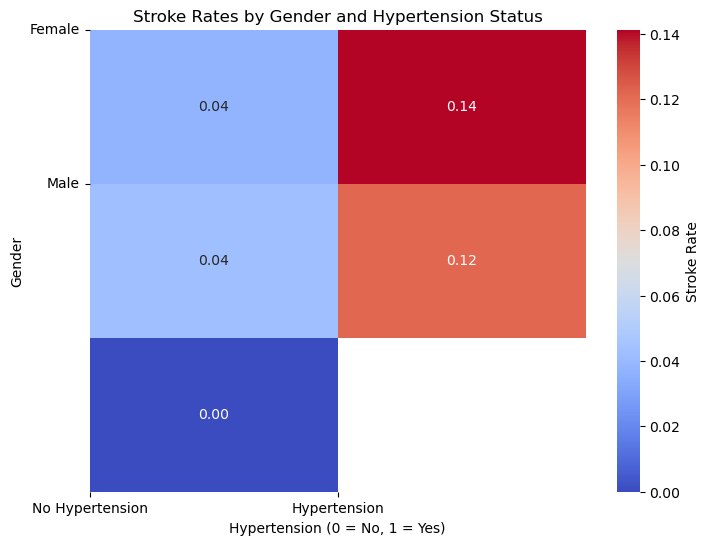

In [52]:
# Heatmap for Combined Effects of Gender and Hypertension
combined_pivot = gender_hypertension_stroke.pivot(index="gender", columns="hypertension", values="stroke")


plt.figure(figsize=(8, 6))
sns.heatmap(combined_pivot, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Stroke Rate'})
plt.title("Stroke Rates by Gender and Hypertension Status")
plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel("Gender")
plt.xticks([0, 1], ["No Hypertension", "Hypertension"])
plt.yticks([0, 1], ["Female", "Male"], rotation=0)
plt.show()

In [53]:
# 4. Statistical Summary
gender_work_summary = df.groupby(["gender", "work_type"])["stroke"].agg(['mean', 'count'])
print("\nStatistical Summary of Stroke by Gender and Work Type:")
gender_work_summary


Statistical Summary of Stroke by Gender and Work Type:


mean  count
gender work_type                     
Female Govt_job       0.057644    399
       Never_worked   0.000000     11
       Private        0.043330   1754
       Self-employed  0.079365    504
       children       0.006135    326
Male   Govt_job       0.038760    258
       Never_worked   0.000000     11
       Private        0.062393   1170
       Self-employed  0.079365    315
       children       0.000000    361
Other  Private        0.000000      1

In [ ]:
# Explanation:
# - The bar plot shows stroke proportions for males and females.
# - The second bar plot visualizes stroke rates by gender and work type, highlighting potential work-related risks.
# - The heatmap combines gender and hypertension effects on stroke rates.

# Açıklama:
# - Bar grafiği, erkekler ve kadınlar için inme oranlarını gösterir.
# - İkinci bar grafiği, cinsiyet ve iş türüne göre inme oranlarını görselleştirerek iş kaynaklı riskleri vurgular.
# - Heatmap, cinsiyet ve hipertansiyonun inme oranları üzerindeki etkisini birleştirir.

<div class="alert alert-block alert-success">

### <span style=" color:red"> How does the combination of risk factors amplify stroke likelihood?
</span>

In [54]:
# Analyzing the Combined Effect of Risk Factors on Stroke Likelihood

# 1. Create a New Column Indicating Combined Risk Factors
df['combined_risk'] = (df['hypertension'] + df['heart_disease']).astype(int)

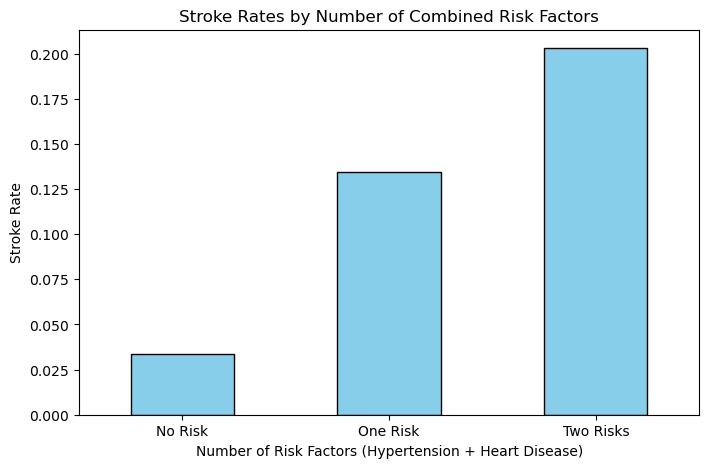

In [55]:
# 2. Calculate Stroke Rates by Combined Risk Factors
combined_risk_stroke = df.groupby("combined_risk")["stroke"].mean()

plt.figure(figsize=(8, 5))
combined_risk_stroke.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Stroke Rates by Number of Combined Risk Factors")
plt.xlabel("Number of Risk Factors (Hypertension + Heart Disease)")
plt.ylabel("Stroke Rate")
plt.xticks([0, 1, 2], ["No Risk", "One Risk", "Two Risks"], rotation=0)
plt.show()

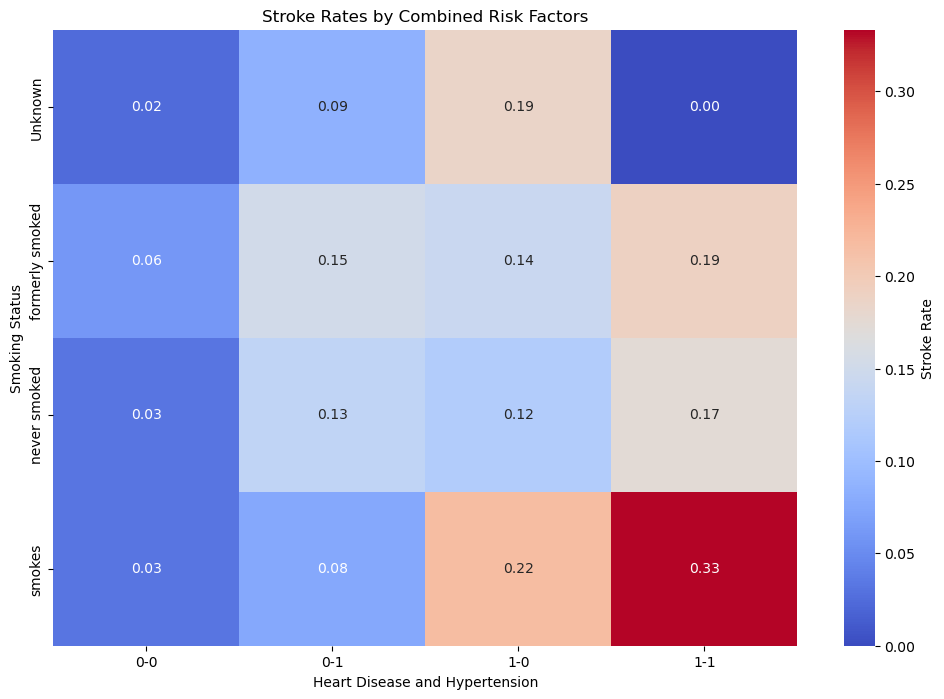

In [56]:
# 3. Heatmap of Stroke Rates by Smoking Status, Heart Disease, and Hypertension
combined_analysis = df.groupby(["smoking_status", "heart_disease", "hypertension"])["stroke"].mean().reset_index()
combined_pivot = combined_analysis.pivot_table(values="stroke", index=["smoking_status"], columns=["heart_disease", "hypertension"])

plt.figure(figsize=(12, 8))
sns.heatmap(combined_pivot, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Stroke Rate'})
plt.title("Stroke Rates by Combined Risk Factors")
plt.xlabel("Heart Disease and Hypertension")
plt.ylabel("Smoking Status")
plt.show()

In [60]:
# 4. Venn Diagram (Optional - Requires matplotlib-venn library)
from matplotlib_venn import venn3

# Create binary indicators for each risk factor
hypertension = df['hypertension'] == 1
heart_disease = df['heart_disease'] == 1
smoking = df['smoking_status'] != "never smoked"

In [59]:
# !pip install matplotlib-venn

C:\Users\ASUS\anaconda3\Lib\site-packages\matplotlib_venn\layout\venn3\pairwise.py:169: UserWarning: Bad circle positioning.
  warnings.warn("Bad circle positioning.")


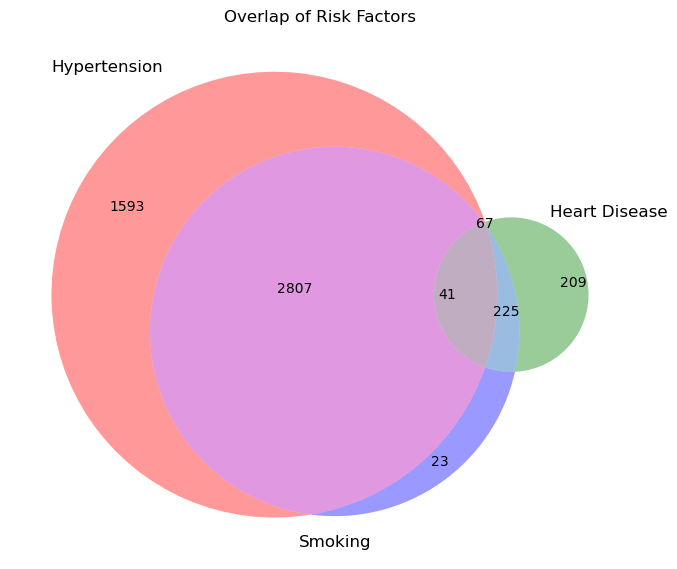

In [61]:
# Calculate overlap between risk factors
plt.figure(figsize=(8, 8))
venn3(subsets=(sum(~hypertension & ~heart_disease & ~smoking),  # No risk factors
               sum(hypertension & ~heart_disease & ~smoking),   # Hypertension only
               sum(~hypertension & heart_disease & ~smoking),   # Heart disease only
               sum(hypertension & heart_disease & ~smoking),    # Hypertension + Heart disease
               sum(~hypertension & ~heart_disease & smoking),   # Smoking only
               sum(hypertension & ~heart_disease & smoking),    # Hypertension + Smoking
               sum(hypertension & heart_disease & smoking)),    # All three factors
      set_labels=('Hypertension', 'Heart Disease', 'Smoking'))
plt.title("Overlap of Risk Factors")
plt.show()

In [ ]:
# Explanation:
# - The bar plot shows stroke rates for combinations of hypertension and heart disease.
# - The heatmap visualizes stroke rates by combinations of smoking status, heart disease, and hypertension.
# - The Venn diagram illustrates the overlap of three major risk factors in the dataset.

# Açıklama:
# - Bar grafiği, hipertansiyon ve kalp hastalığı kombinasyonlarına göre inme oranlarını gösterir.
# - Heatmap, sigara içme durumu, kalp hastalığı ve hipertansiyon kombinasyonlarının inme oranları üzerindeki etkisini görselleştirir.
# - Venn diyagramı, veri setindeki üç ana risk faktörünün örtüşmesini gösterir.


<div class="alert alert-block alert-success">

### <span style=" color:red"> Do lifestyle and residence type influence stroke patterns?
</span>

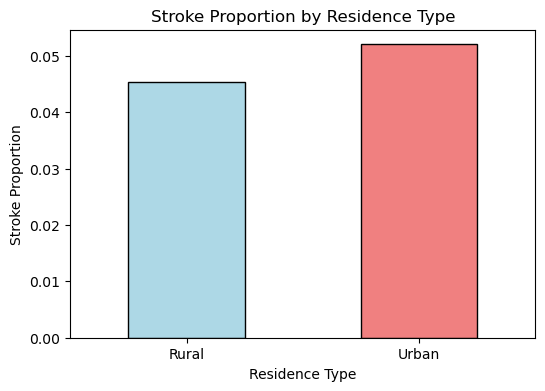

In [64]:
# Analyzing the Influence of Lifestyle and Residence Type on Stroke Patterns

# 1. Stroke Proportion by Residence Type
residence_stroke_rate = df.groupby("Residence_type")["stroke"].mean()

plt.figure(figsize=(6, 4))
residence_stroke_rate.plot(kind="bar", color=["lightblue", "lightcoral"], edgecolor="black")
plt.title("Stroke Proportion by Residence Type")
plt.xlabel("Residence Type")
plt.ylabel("Stroke Proportion")
plt.xticks([0, 1], ["Rural", "Urban"], rotation=0)
plt.show()

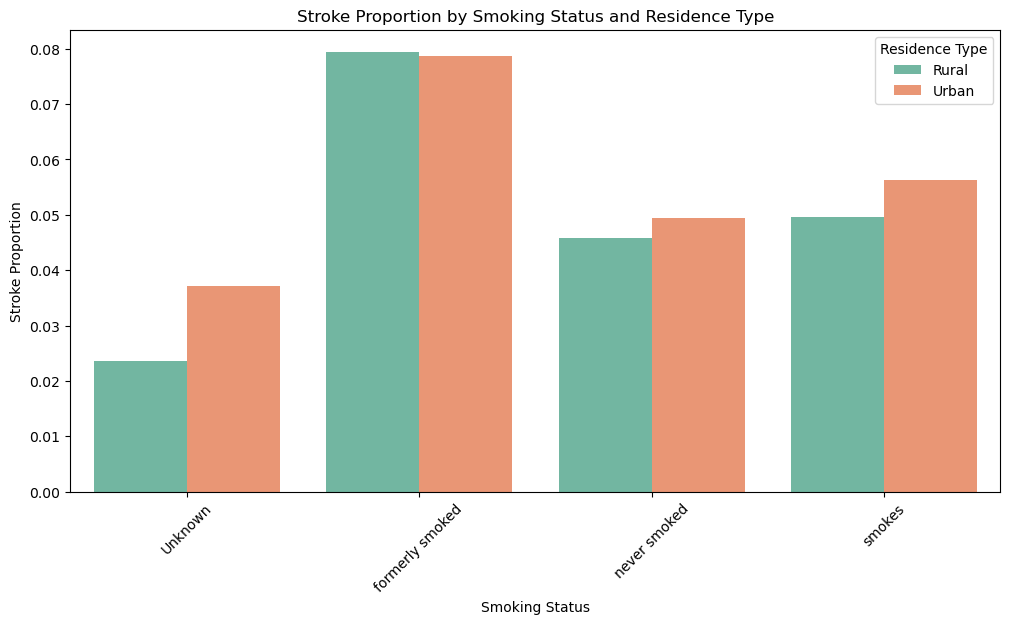

In [65]:
# 2. Stroke Proportion by Smoking Status and Residence Type
residence_smoking_stroke = df.groupby(["Residence_type", "smoking_status"])["stroke"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=residence_smoking_stroke, x="smoking_status", y="stroke", hue="Residence_type", palette="Set2")
plt.title("Stroke Proportion by Smoking Status and Residence Type")
plt.xlabel("Smoking Status")
plt.ylabel("Stroke Proportion")
plt.legend(title="Residence Type")
plt.xticks(rotation=45)
plt.show()

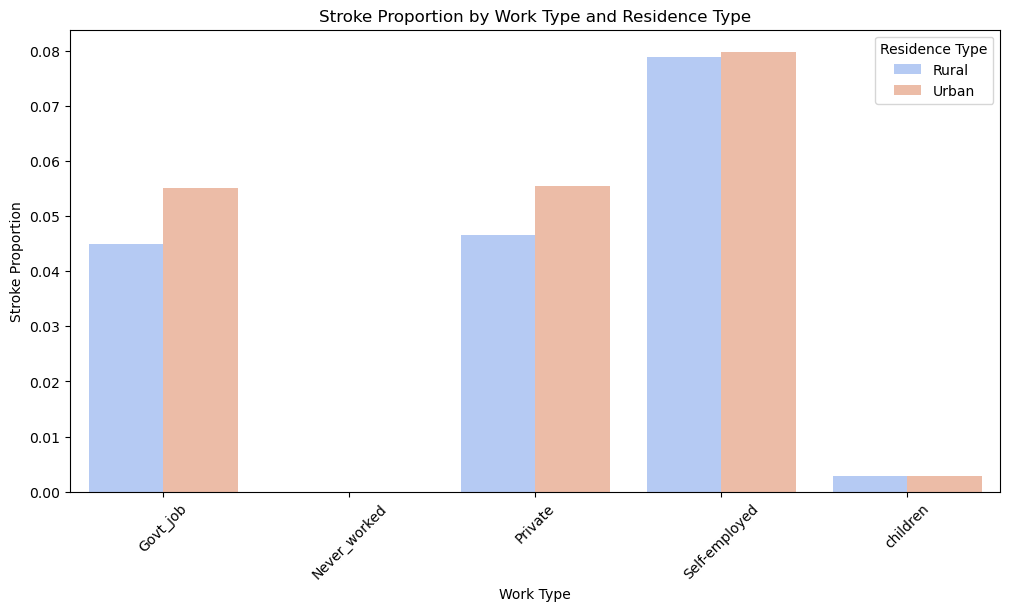

In [66]:
# 3. Stroke Proportion by Work Type and Residence Type
residence_work_stroke = df.groupby(["Residence_type", "work_type"])["stroke"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=residence_work_stroke, x="work_type", y="stroke", hue="Residence_type", palette="coolwarm")
plt.title("Stroke Proportion by Work Type and Residence Type")
plt.xlabel("Work Type")
plt.ylabel("Stroke Proportion")
plt.legend(title="Residence Type")
plt.xticks(rotation=45)
plt.show()

In [67]:
# 4. Statistical Summary
residence_summary = df.groupby(["Residence_type", "smoking_status", "work_type"])["stroke"].agg(['mean', 'count'])
print("\nStatistical Summary of Stroke by Residence Type, Smoking Status, and Work Type:")
residence_summary


Statistical Summary of Stroke by Residence Type, Smoking Status, and Work Type:


mean  count
Residence_type smoking_status  work_type                     
Rural          Unknown         Govt_job       0.035714     56
                               Never_worked   0.000000      4
                               Private        0.037152    323
                               Self-employed  0.041667     72
                               children       0.003257    307
               formerly smoked Govt_job       0.061538     65
                               Private        0.079245    265
                               Self-employed  0.096774     93
                               children       0.000000      5
               never smoked    Govt_job       0.034965    143
                               Never_worked   0.000000      3
                               Private        0.039024    615
                               Self-employed  0.086705    173
                               children       0.000000     27
               smokes          Govt_job       0.062500     48
                               Private        0.042471    259
                               Self-employed  0.072727     55
                               children       0.000000      1
Urban          Unknown         Govt_job       0.090909     66
                               Never_worked   0.000000      4
                               Private        0.053628    317
                               Self-employed  0.059524     84
                               children       0.003215    311
               formerly smoked Govt_job       0.058824     68
                               Private        0.082707    266
                               Self-employed  0.086957    115
                               children       0.000000      8
               never smoked    Govt_job       0.050360    139
                               Never_worked   0.000000     11
                               Private        0.040268    596
                               Self-employed  0.094937    158
                               children       0.000000     27
               smokes          Govt_job       0.027778     72
                               Private        0.063380    284
                               Self-employed  0.057971     69
                               children       0.000000      1

In [ ]:
# Explanation:
# - Bar plots compare stroke rates for rural vs urban residents by lifestyle factors like smoking and work type.
# - Statistical summaries quantify these trends.

# Açıklama:
# - Bar grafikleri, kırsal ve şehirde yaşayanların yaşam tarzı faktörlerine (ör. sigara içme durumu, iş türü) göre inme oranlarını karşılaştırır.
# - İstatistiksel özetler, bu eğilimleri sayısal olarak açıklar.

<div class="alert alert-block alert-success">

### <span style=" color:red"> What patterns emerge when analyzing age and lifestyle factors together?
</span>

How does stroke probability change as more risk factors overlap (e.g., age > 60, smoking, and heart disease)?

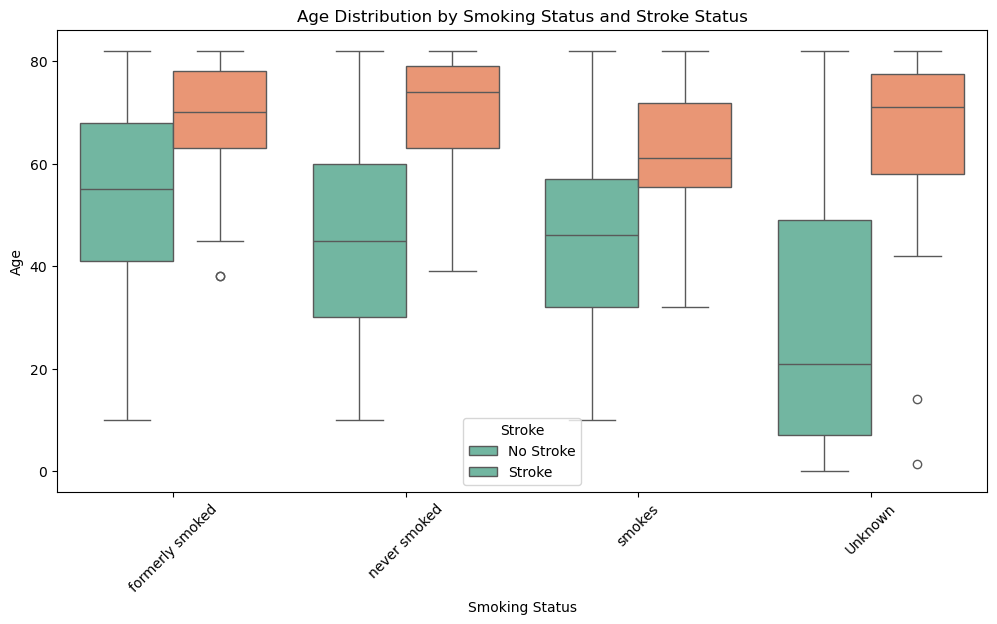

In [68]:
# Analyzing Patterns Between Age and Lifestyle Factors

# 1. Age Distribution by Smoking Status and Stroke Status
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="smoking_status", y="age", hue="stroke", palette="Set2")
plt.title("Age Distribution by Smoking Status and Stroke Status")
plt.xlabel("Smoking Status")
plt.ylabel("Age")
plt.legend(title="Stroke", labels=["No Stroke", "Stroke"])
plt.xticks(rotation=45)
plt.show()

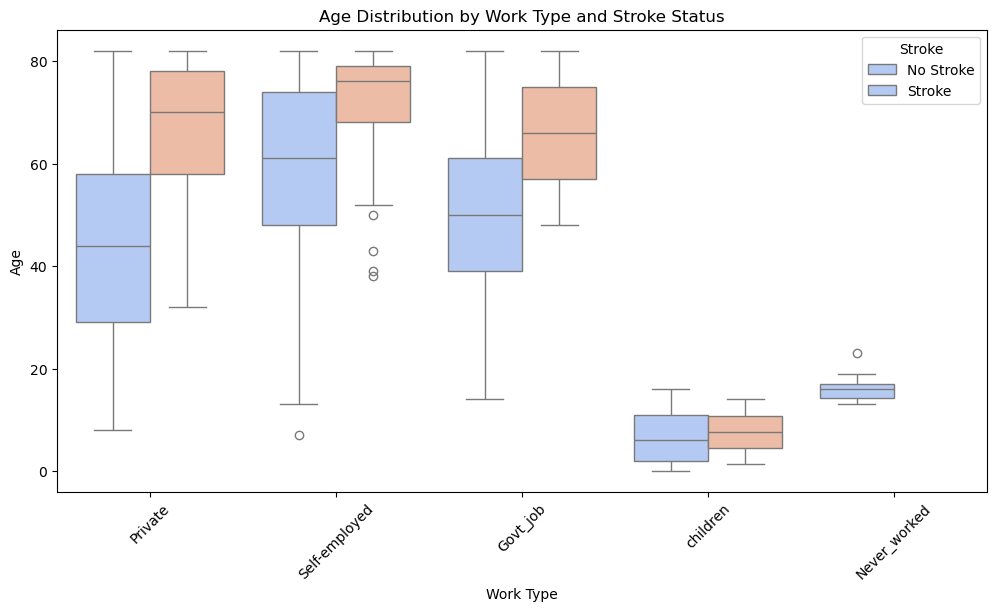

In [69]:
# 2. Age vs Work Type by Stroke Status
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="work_type", y="age", hue="stroke", palette="coolwarm")
plt.title("Age Distribution by Work Type and Stroke Status")
plt.xlabel("Work Type")
plt.ylabel("Age")
plt.legend(title="Stroke", labels=["No Stroke", "Stroke"])
plt.xticks(rotation=45)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24004\730912090.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stroke_rate = df.groupby(["age_group", "smoking_status"])["stroke"].mean().reset_index()


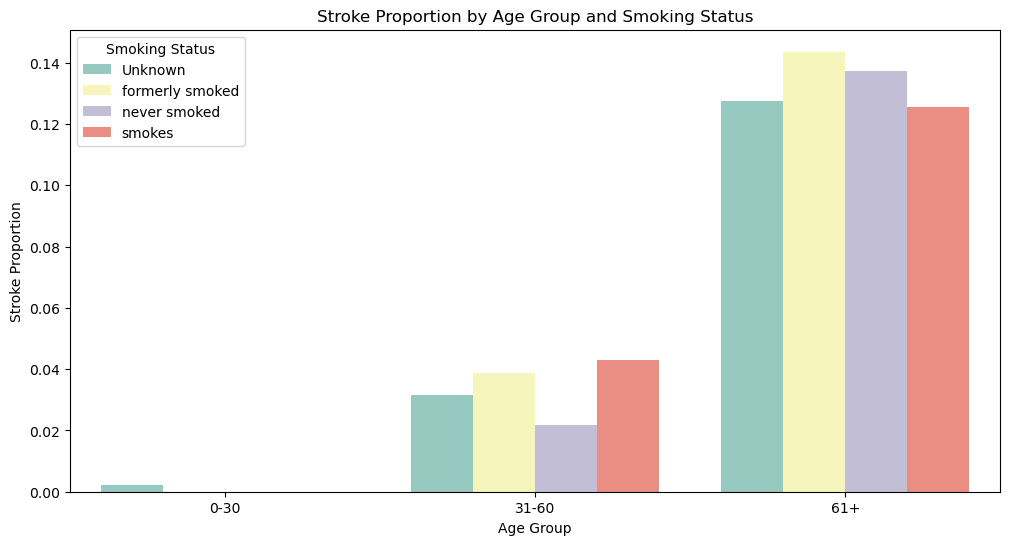

In [70]:
# 3. Age Group Categorization and Stroke Proportion
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 60, 90], labels=["0-30", "31-60", "61+"])
age_group_stroke_rate = df.groupby(["age_group", "smoking_status"])["stroke"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=age_group_stroke_rate, x="age_group", y="stroke", hue="smoking_status", palette="Set3")
plt.title("Stroke Proportion by Age Group and Smoking Status")
plt.xlabel("Age Group")
plt.ylabel("Stroke Proportion")
plt.legend(title="Smoking Status")
plt.show()

In [71]:
# 4. Statistical Summary
age_lifestyle_summary = df.groupby(["age_group", "work_type", "smoking_status"])["stroke"].agg(['mean', 'count'])
print("\nStatistical Summary of Stroke by Age Group, Work Type, and Smoking Status:")
age_lifestyle_summary


Statistical Summary of Stroke by Age Group, Work Type, and Smoking Status:


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24004\2078876441.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_lifestyle_summary = df.groupby(["age_group", "work_type", "smoking_status"])["stroke"].agg(['mean', 'count'])


mean  count
age_group work_type     smoking_status                  
0-30      Govt_job      Unknown          0.000000     12
                        formerly smoked  0.000000      9
                        never smoked     0.000000     32
                        smokes           0.000000     16
          Never_worked  Unknown          0.000000      8
                        formerly smoked       NaN      0
                        never smoked     0.000000     14
                        smokes                NaN      0
          Private       Unknown          0.000000    205
                        formerly smoked  0.000000     70
                        never smoked     0.000000    347
                        smokes           0.000000    124
          Self-employed Unknown          0.000000     16
                        formerly smoked  0.000000      5
                        never smoked     0.000000     19
                        smokes           0.000000      6
          children      Unknown          0.003236    618
                        formerly smoked  0.000000     13
                        never smoked     0.000000     54
                        smokes           0.000000      2
31-60     Govt_job      Unknown          0.040541     74
                        formerly smoked  0.025974     77
                        never smoked     0.023121    173
                        smokes           0.024390     82
          Never_worked  Unknown               NaN      0
                        formerly smoked       NaN      0
                        never smoked          NaN      0
                        smokes                NaN      0
          Private       Unknown          0.032573    307
                        formerly smoked  0.049618    262
                        never smoked     0.019576    613
                        smokes           0.046296    324
          Self-employed Unknown          0.016393     61
                        formerly smoked  0.013699     73
                        never smoked     0.030769    130
                        smokes           0.050000     60
          children      Unknown               NaN      0
                        formerly smoked       NaN      0
                        never smoked          NaN      0
                        smokes                NaN      0
61+       Govt_job      Unknown          0.138889     36
                        formerly smoked  0.127660     47
                        never smoked     0.103896     77
                        smokes           0.136364     22
          Never_worked  Unknown               NaN      0
                        formerly smoked       NaN      0
                        never smoked          NaN      0
                        smokes                NaN      0
          Private       Unknown          0.148438    128
                        formerly smoked  0.150754    199
                        never smoked     0.143426    251
                        smokes           0.147368     95
          Self-employed Unknown          0.088608     79
                        formerly smoked  0.138462    130
                        never smoked     0.142857    182
                        smokes           0.086207     58
          children      Unknown               NaN      0
                        formerly smoked       NaN      0
                        never smoked          NaN      0
                        smokes                NaN      0

In [ ]:
# Explanation:
# - Boxplots visualize age distribution across lifestyle factors (e.g., smoking, work type) and stroke status.
# - Bar plots highlight stroke rates for different age groups categorized by lifestyle factors.

# Açıklama:
# - Boxplot grafikleri, yaş dağılımını yaşam tarzı faktörleri (ör. sigara içme durumu, iş türü) ve inme durumuna göre görselleştirir.
# - Bar grafikler, farklı yaş gruplarında yaşam tarzı faktörlerine göre inme oranlarını vurgular.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Does marital status (ever_married) correlate with stroke likelihood?
</span>

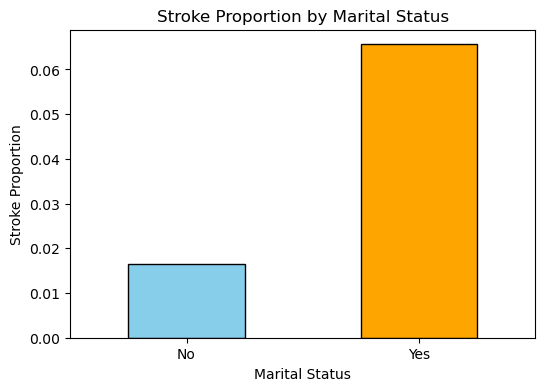

In [72]:
# Analyzing the Correlation Between Marital Status and Stroke Likelihood

# 1. Stroke Proportion by Marital Status
marital_stroke_rate = df.groupby("ever_married")["stroke"].mean()

plt.figure(figsize=(6, 4))
marital_stroke_rate.plot(kind="bar", color=["skyblue", "orange"], edgecolor="black")
plt.title("Stroke Proportion by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Stroke Proportion")
plt.xticks([0, 1], ["No", "Yes"], rotation=0)
plt.show()

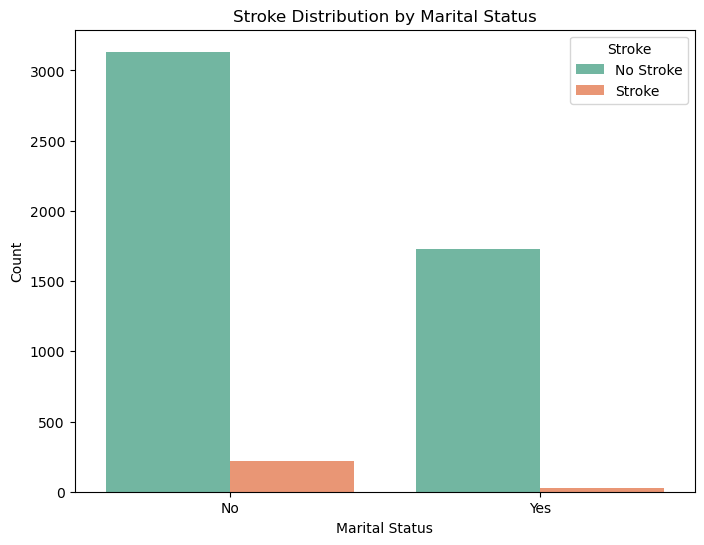

In [73]:
# 2. Marital Status and Stroke Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="ever_married", hue="stroke", palette="Set2")
plt.title("Stroke Distribution by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.legend(title="Stroke", labels=["No Stroke", "Stroke"])
plt.xticks([0, 1], ["No", "Yes"], rotation=0)
plt.show()

In [76]:
# 3. Statistical Summary of Stroke by Marital Status
marital_summary = df.groupby("ever_married")["stroke"].agg(['mean', 'count'])
print("\nStatistical Summary of Stroke by Marital Status:")
marital_summary


Statistical Summary of Stroke by Marital Status:


,mean,count
ever_married,,
No,0.016505,1757
Yes,0.065613,3353


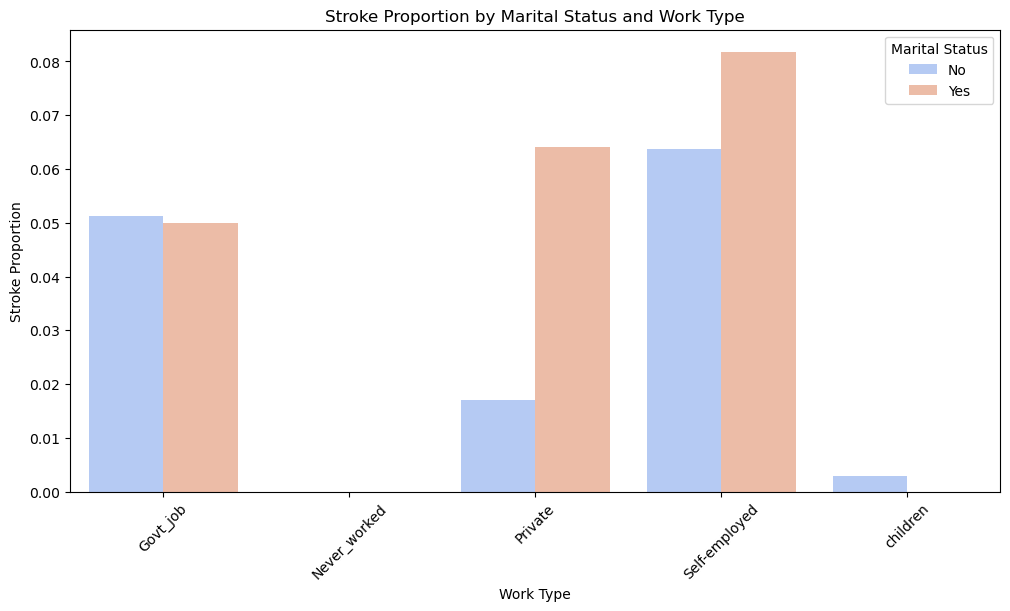

In [75]:
# 4. Combined Analysis: Marital Status, Work Type, and Stroke
marital_work_stroke = df.groupby(["ever_married", "work_type"])["stroke"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=marital_work_stroke, x="work_type", y="stroke", hue="ever_married", palette="coolwarm")
plt.title("Stroke Proportion by Marital Status and Work Type")
plt.xlabel("Work Type")
plt.ylabel("Stroke Proportion")
plt.legend(title="Marital Status")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Explanation:
# - The bar plot shows stroke proportions for married vs unmarried individuals.
# - The countplot highlights stroke distribution across marital status groups.
# - Combined analysis examines stroke rates by marital status and work type.

# Açıklama:
# - Bar grafiği, evli ve bekar bireyler için inme oranlarını gösterir.
# - Countplot, medeni durum grupları arasındaki inme dağılımını vurgular.
# - Kombine analiz, medeni durum ve iş türüne göre inme oranlarını inceler.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Are there regional trends in stroke occurrence (Urban vs Rural)?
</span>

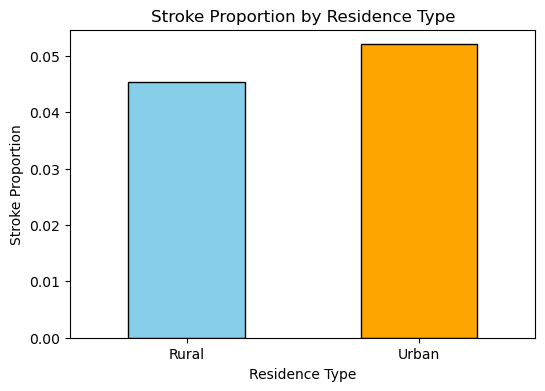

In [78]:
# Analyzing Regional Trends in Stroke Occurrence (Urban vs Rural)

# 1. Stroke Proportion by Residence Type
residence_stroke_rate = df.groupby("Residence_type")["stroke"].mean()

plt.figure(figsize=(6, 4))
residence_stroke_rate.plot(kind="bar", color=["skyblue", "orange"], edgecolor="black")
plt.title("Stroke Proportion by Residence Type")
plt.xlabel("Residence Type")
plt.ylabel("Stroke Proportion")
plt.xticks([0, 1], ["Rural", "Urban"], rotation=0)
plt.show()

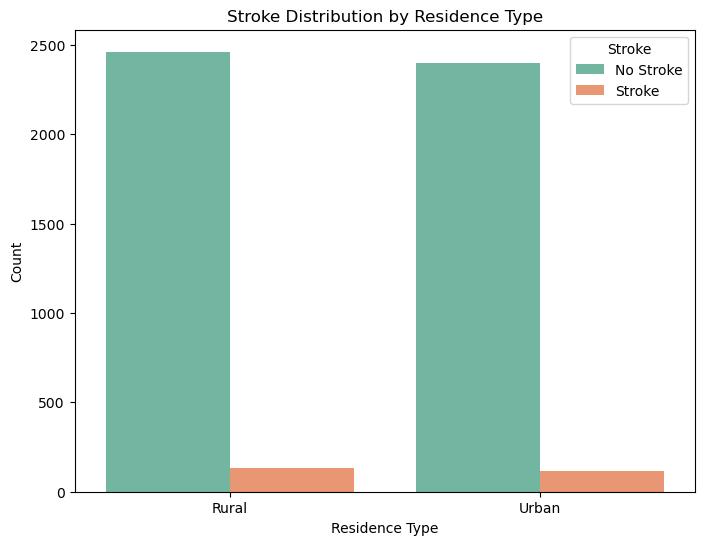

In [79]:
# 2. Stroke Distribution by Residence Type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Residence_type", hue="stroke", palette="Set2")
plt.title("Stroke Distribution by Residence Type")
plt.xlabel("Residence Type")
plt.ylabel("Count")
plt.legend(title="Stroke", labels=["No Stroke", "Stroke"])
plt.xticks([0, 1], ["Rural", "Urban"], rotation=0)
plt.show()

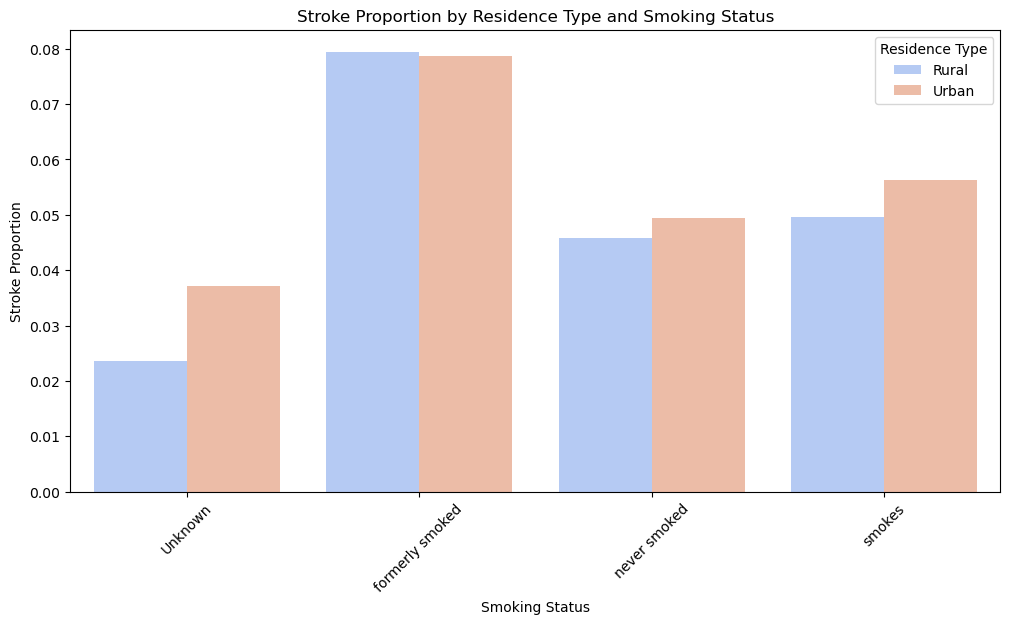

In [82]:
# 3. Combined Analysis: Residence Type and Smoking Status
residence_smoking_stroke = df.groupby(["Residence_type", "smoking_status"])["stroke"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=residence_smoking_stroke, x="smoking_status", y="stroke", hue="Residence_type", palette="coolwarm")
plt.title("Stroke Proportion by Residence Type and Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Stroke Proportion")
plt.legend(title="Residence Type")
plt.xticks(rotation=45)
plt.show()

In [84]:
# 4. Statistical Summary
residence_summary = df.groupby(["Residence_type", "smoking_status"])["stroke"].agg(['mean', 'count'])
print("\nStatistical Summary of Stroke by Residence Type and Smoking Status:")
residence_summary


Statistical Summary of Stroke by Residence Type and Smoking Status:


mean  count
Residence_type smoking_status                  
Rural          Unknown          0.023622    762
               formerly smoked  0.079439    428
               never smoked     0.045786    961
               smokes           0.049587    363
Urban          Unknown          0.037084    782
               formerly smoked  0.078775    457
               never smoked     0.049409    931
               smokes           0.056338    426

In [ ]:
# Explanation:
# - Bar plots compare stroke rates for rural vs urban residents.
# - Countplot shows the distribution of stroke cases across residence types.
# - Combined analysis examines how smoking status interacts with residence type in influencing stroke rates.

# Açıklama:
# - Bar grafikler, kırsal ve şehirde yaşayanların inme oranlarını karşılaştırır.
# - Countplot, inme vakalarının yerleşim türlerine göre dağılımını gösterir.
# - Kombine analiz, sigara içme durumu ve yerleşim türünün inme oranları üzerindeki etkisini inceler.

<div class="alert alert-block alert-success">

### <span style=" color:red"> How are continuous variables related to categorical variables?
</span>

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24004\2811778659.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="stroke", y="age", palette="Set2")


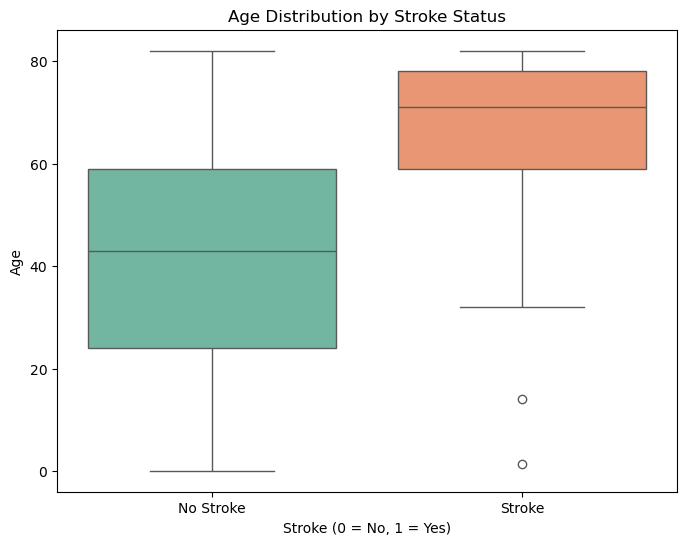

In [85]:
# Analyzing Relationships Between Continuous and Categorical Variables

# 1. Age Distribution Across Stroke Categories
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="stroke", y="age", palette="Set2")
plt.title("Age Distribution by Stroke Status")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.xticks([0, 1], ["No Stroke", "Stroke"])
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24004\1028112844.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="work_type", y="bmi", palette="coolwarm")


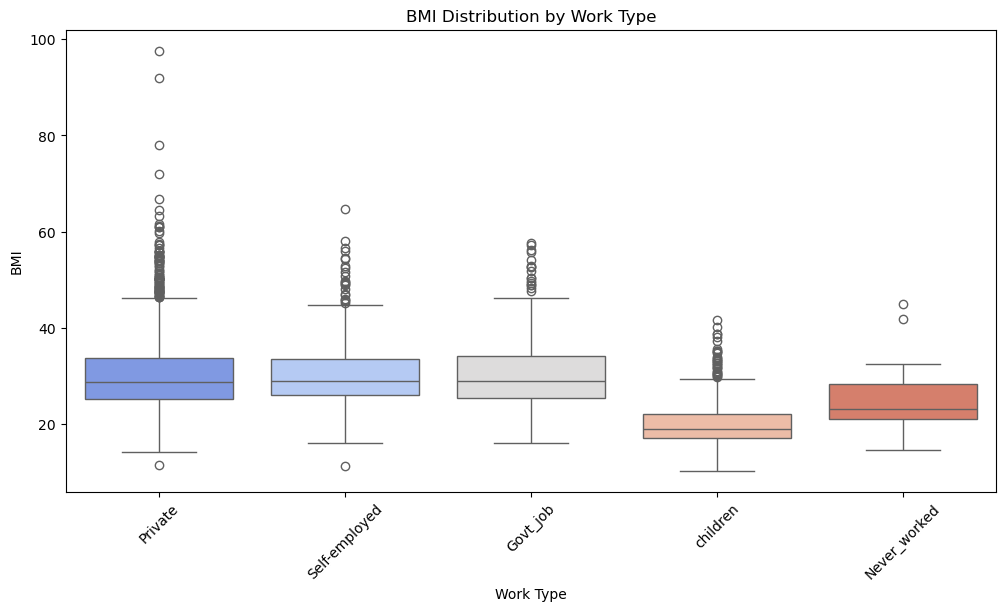

In [86]:
# 2. BMI Distribution Across Work Types
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="work_type", y="bmi", palette="coolwarm")
plt.title("BMI Distribution by Work Type")
plt.xlabel("Work Type")
plt.ylabel("BMI")
plt.xticks(rotation=45)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24004\2203336470.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="smoking_status", y="avg_glucose_level", palette="flare")


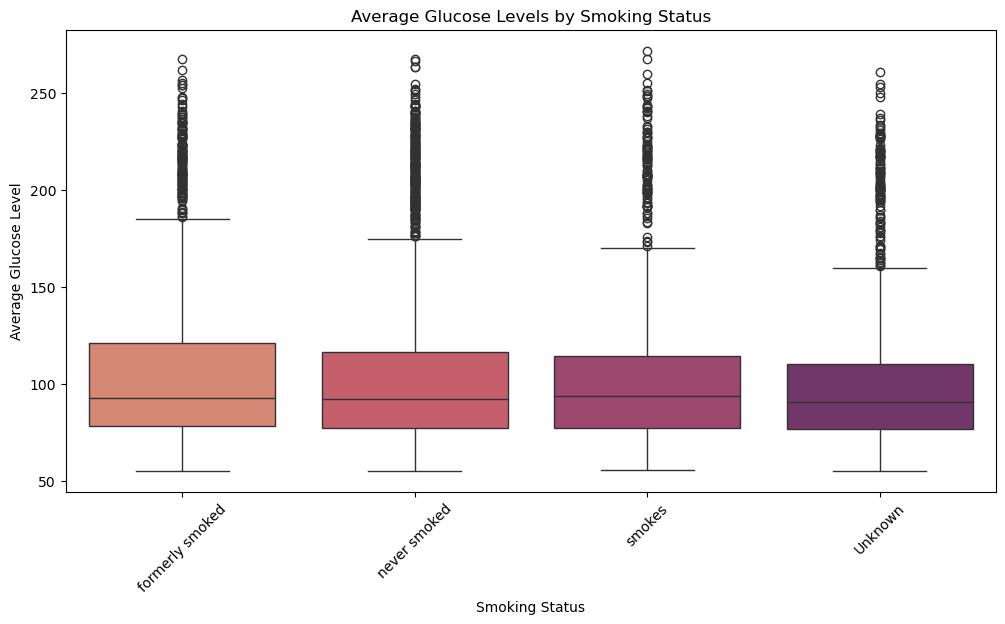

In [87]:
# 3. Glucose Levels Across Smoking Status
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="smoking_status", y="avg_glucose_level", palette="flare")
plt.title("Average Glucose Levels by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Average Glucose Level")
plt.xticks(rotation=45)
plt.show()

In [88]:
# 4. Statistical Summary
stat_summary = df.groupby(["stroke", "work_type", "smoking_status"])[["age", "bmi", "avg_glucose_level"]].mean()
print("\nStatistical Summary of Continuous Variables by Stroke, Work Type, and Smoking Status:")
stat_summary


Statistical Summary of Continuous Variables by Stroke, Work Type, and Smoking Status:


age        bmi  avg_glucose_level
stroke work_type     smoking_status                                          
0      Govt_job      Unknown          49.684211  29.926316         100.072807
                     formerly smoked  53.352000  31.254400         114.589840
                     never smoked     49.477778  30.197037         107.483852
                     smokes           48.200000  30.898261         100.552000
       Never_worked  Unknown          15.375000  22.037500          92.842500
                     never smoked     16.642857  27.550000          97.871429
       Private       Unknown          41.689034  29.839280         102.940900
                     formerly smoked  51.668033  30.700615         108.748648
                     never smoked     43.043852  30.119518         104.902614
                     smokes           43.451362  30.320039         104.719416
       Self-employed Unknown          57.358108  29.448649         102.473108
                     formerly smoked  62.291005  30.644444         116.791111
                     never smoked     59.083056  30.169103         111.420066
                     smokes           57.086207  30.268966         117.986897
       children      Unknown           6.221883  19.873701          93.676640
                     formerly smoked  11.769231  20.815385          87.777692
                     never smoked     12.537037  23.655556         103.856296
                     smokes           11.000000  22.950000         135.265000
1      Govt_job      Unknown          65.000000  27.487500         115.718750
                     formerly smoked  69.500000  29.450000         135.171250
                     never smoked     65.833333  30.908333         150.205000
                     smokes           65.400000  27.260000         137.116000
       Private       Unknown          68.517241  29.031034         133.413448
                     formerly smoked  66.837209  31.504651         139.056512
                     never smoked     69.583333  30.568750         136.734583
                     smokes           62.689655  30.986207         143.977241
       Self-employed Unknown          71.500000  29.525000         117.872500
                     formerly smoked  72.315789  28.568421         117.667368
                     never smoked     73.266667  29.576667         119.864333
                     smokes           61.625000  30.250000         127.321250
       children      Unknown           7.660000  29.500000          64.150000

In [ ]:
# Explanation:
# - Boxplots visualize how continuous variables (age, BMI, glucose level) vary across categories (stroke, work type, smoking status).
# - Statistical summaries provide mean values for continuous variables grouped by multiple categorical variables.

# Açıklama:
# - Boxplot grafikleri, sürekli değişkenlerin (yaş, BMI, glikoz seviyesi) kategorilere (inme, iş türü, sigara içme durumu) göre nasıl değiştiğini görselleştirir.
# - İstatistiksel özetler, sürekli değişkenlerin ortalama değerlerini birden fazla kategorik değişkene göre sağlar.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Feel free to include any additional analyses.
</span>

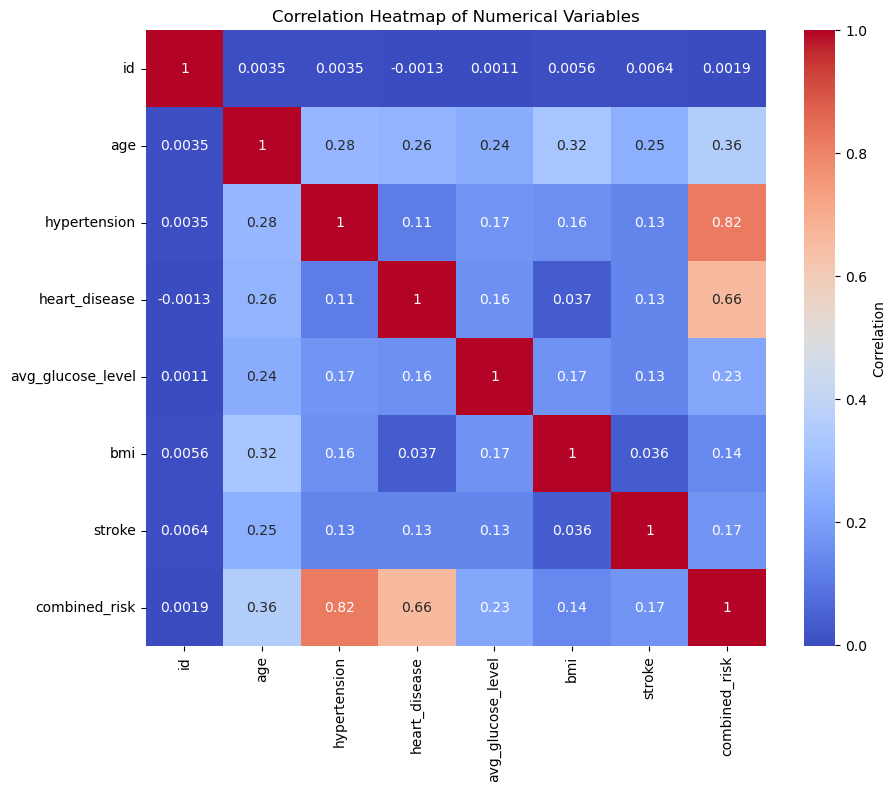

In [90]:
# Correlation Heatmap for Numerical Variables
# Filter numerical columns
numerical_df = df.select_dtypes(include=["number"])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", cbar_kws={'label': 'Correlation'})
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

# Explanation:
# - This heatmap shows the strength of relationships between numerical features.
# - Helps identify highly correlated variables, useful for feature selection or engineering.

# Açıklama:
# - Bu heatmap, sayısal değişkenler arasındaki ilişkilerin gücünü gösterir.
# - Özellik seçimi veya türetme için yüksek korelasyonlu değişkenleri belirlemeye yardımcı olur.

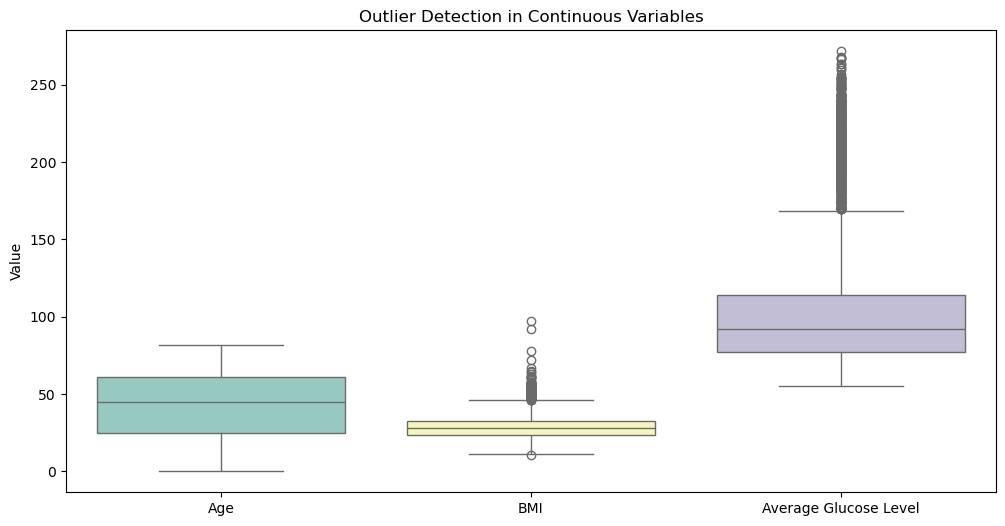

In [91]:
# Boxplot for Outlier Detection in Continuous Variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["age", "bmi", "avg_glucose_level"]], palette="Set3")
plt.title("Outlier Detection in Continuous Variables")
plt.ylabel("Value")
plt.xticks([0, 1, 2], ["Age", "BMI", "Average Glucose Level"])
plt.show()

# Explanation:
# - Boxplots visualize potential outliers in continuous variables like age, BMI, and glucose levels.

# Açıklama:
# - Boxplot grafikleri, yaş, BMI ve glikoz seviyesi gibi sürekli değişkenlerdeki potansiyel aykırı değerleri görselleştirir.

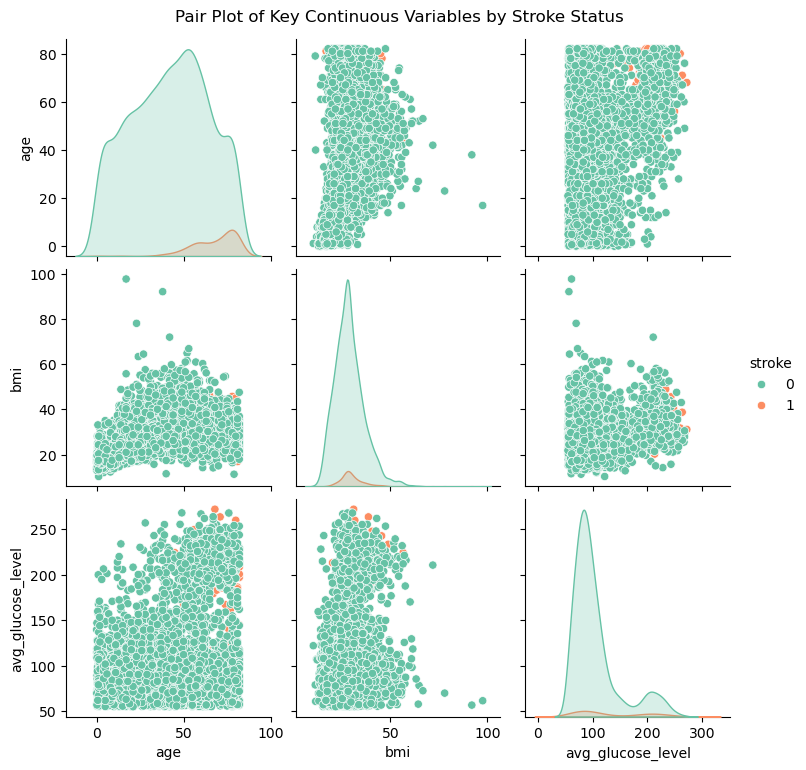

In [92]:
# Pair Plot for Key Variables
sns.pairplot(df, vars=["age", "bmi", "avg_glucose_level"], hue="stroke", palette="Set2")
plt.suptitle("Pair Plot of Key Continuous Variables by Stroke Status", y=1.02)
plt.show()

# Explanation:
# - Pair plots help visualize relationships and clustering between multiple variables.
# - Colored by stroke status, it can reveal separability of the data.

# Açıklama:
# - Pair plotlar, birden fazla değişken arasındaki ilişkileri ve kümelenmeyi görselleştirir.
# - Inme durumuna göre renklendirilerek, verilerin ayrılabilirliğini ortaya çıkarabilir.

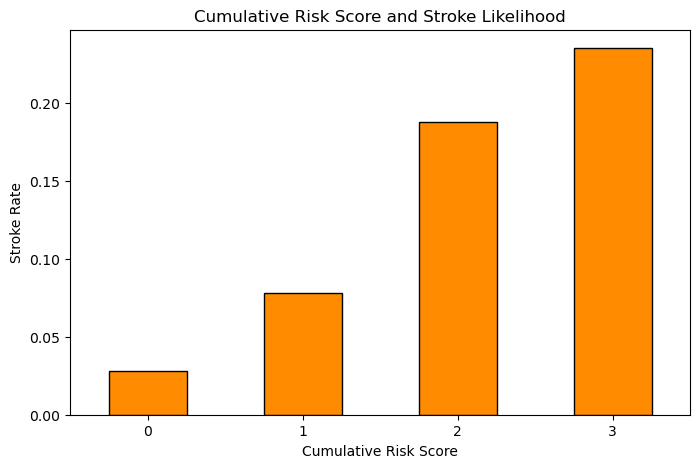

In [93]:
# Calculate Cumulative Risk for Multiple Factors
df["risk_score"] = df["hypertension"] + df["heart_disease"] + (df["avg_glucose_level"] > 125).astype(int)

# Average Stroke Rate by Risk Score
risk_score_stroke = df.groupby("risk_score")["stroke"].mean()

plt.figure(figsize=(8, 5))
risk_score_stroke.plot(kind="bar", color="darkorange", edgecolor="black")
plt.title("Cumulative Risk Score and Stroke Likelihood")
plt.xlabel("Cumulative Risk Score")
plt.ylabel("Stroke Rate")
plt.xticks(rotation=0)
plt.show()

# Explanation:
# - Combines hypertension, heart disease, and glucose levels into a cumulative risk score.
# - Analyzes stroke rates as the risk score increases.

# Açıklama:
# - Hipertansiyon, kalp hastalığı ve glikoz seviyelerini bir araya getirerek kümülatif bir risk skoru oluşturur.
# - Risk skoru arttıkça inme oranlarını analiz eder.

In [94]:
from scipy.stats import chi2_contingency

# Contingency Table for Stroke and Smoking Status
contingency_table = pd.crosstab(df["smoking_status"], df["stroke"])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")

# Explanation:
# - A chi-square test evaluates the independence of stroke and smoking status.
# - A low p-value indicates a significant relationship between the variables.

# Açıklama:
# - Ki-kare testi, inme ve sigara içme durumu arasındaki bağımsızlığı değerlendirir.
# - Düşük p-değeri, değişkenler arasında anlamlı bir ilişki olduğunu gösterir.

Chi-Square Test Results:
Chi2 Statistic: 29.147269191399264
P-Value: 2.0853997025008455e-06


<div class="alert alert-info alert-warning ">

# <span style=" color:red">Conclusions
</span>

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Congratulations!</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |